In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Housing.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Data Columns** <br>
**id** : Unique identifier for each property <br>
**date** : Date of property listing <br>
**price** : Property price in currency <br>
**bedrooms** : Number of bedrooms <br>
**bathrooms** : Number of bathrooms <br>
**sqft_living** : Living area size in square feet <br>
**sqft_lot** : Total lot size in square feet <br>
**floors** : Number of floors <br>
**waterfront** : Indicates if property has waterfront view (0 for no, 1 for yes) <br>
**view** : Quality level of property view (0 to 4) <br>
**condition** : Overall condition rating (1 to 5) <br>
**grade** : Overall grade rating (1 to 13) <br>
**sqft_above** : Living area above ground level in square feet <br>
**sqft_basement** : Basement area in square feet <br>
**yr_built** : Year property was built <br>
**yr_renovated** : Year property was last renovated (0 if never) <br>
**zipcode** : Property location zip code <br>
**lat** : Latitude coordinate of property location <br>
**long** : Longitude coordinate of property location <br>
**sqft_living15** : Living area size of 15 nearest properties in square feet <br> **sqft_lot15** : Lot size of 15 nearest properties in square feet

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# removing useless columns
data = data.drop(['id'],axis=1)
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [5]:
# converting date column from object to date type
data['date']=pd.to_datetime(data['date'])
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [6]:
def plotHistogram(column):
  plt.figure()
  plt.hist(data[column],bins=85,color="orange")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title("Data Frequency - {}".format(column))
  plt.show()

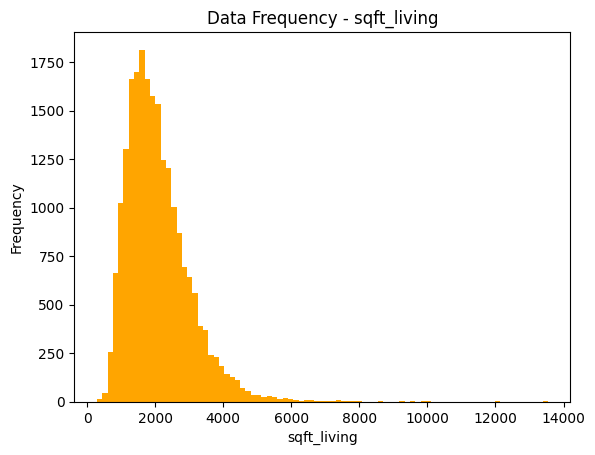

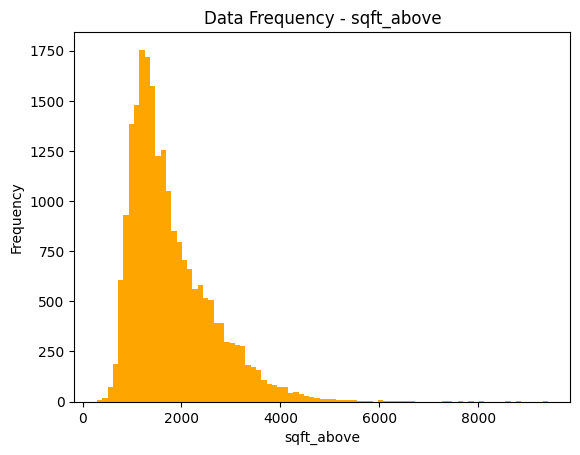

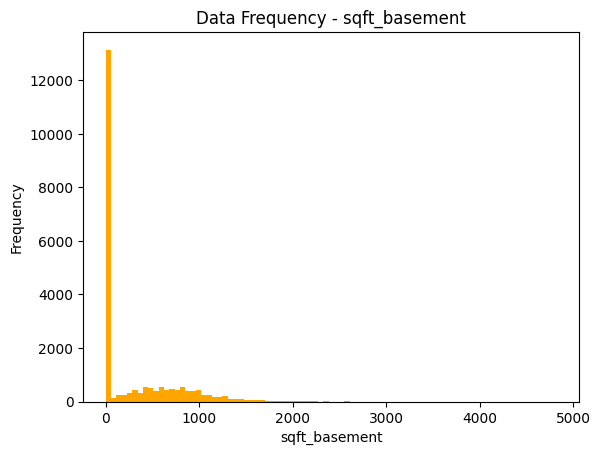

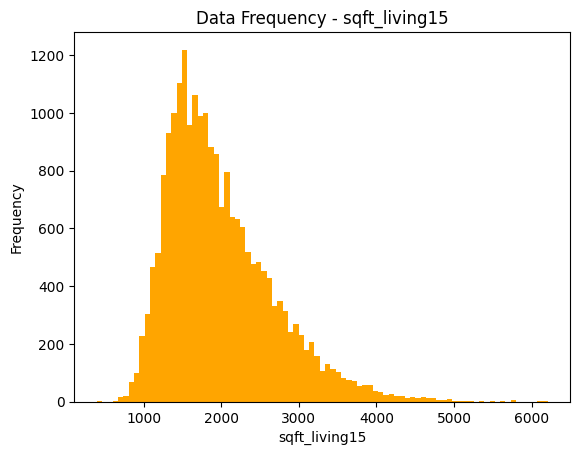

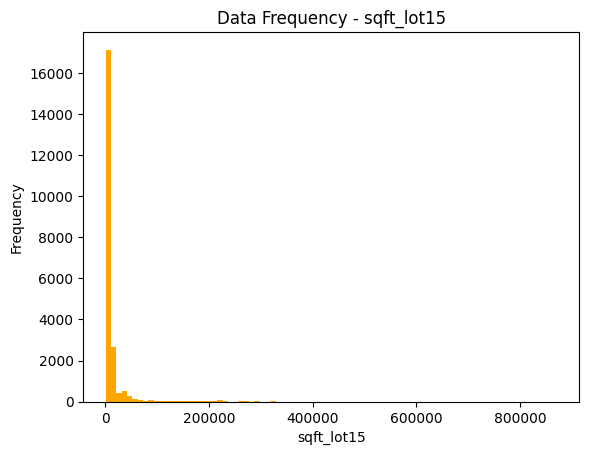

In [7]:
columns=["sqft_living","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]
for i in columns:
  plotHistogram(i)

In [8]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


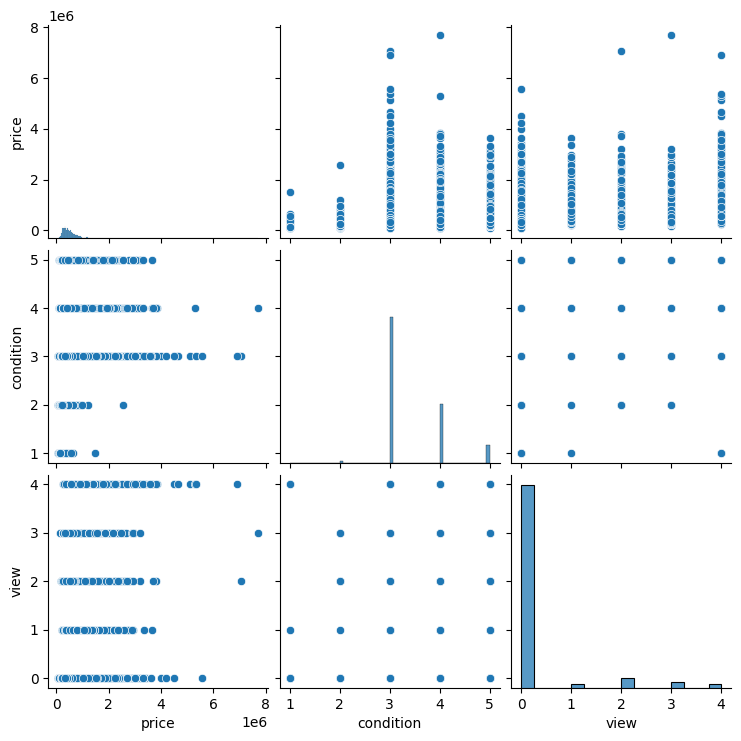

In [9]:
columns=["price","condition","view"]
sns.pairplot(data[columns])
plt.show()

In [10]:
data.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,-0.004357,-0.016792,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.004357,1.000000,0.308377,0.525136,0.702035,0.089661,0.256793,0.266370,0.397294,0.036361,0.667434,0.605567,0.323816,0.054011,0.126434,-0.053201,0.307003,0.021626,0.585378,0.082447
bedrooms,-0.016792,0.308377,1.000000,0.515932,0.576693,0.031713,0.175466,-0.006578,0.079543,0.028502,0.356978,0.477614,0.303112,0.154198,0.018850,-0.152754,-0.008913,0.129482,0.391666,0.029256
bathrooms,-0.034410,0.525136,0.515932,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.034559,0.702035,0.576693,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.006313,0.089661,0.031713,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022491,0.256793,0.175466,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.001356,0.266370,-0.006578,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.001800,0.397294,0.079543,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.050769,0.036361,0.028502,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<Axes: >

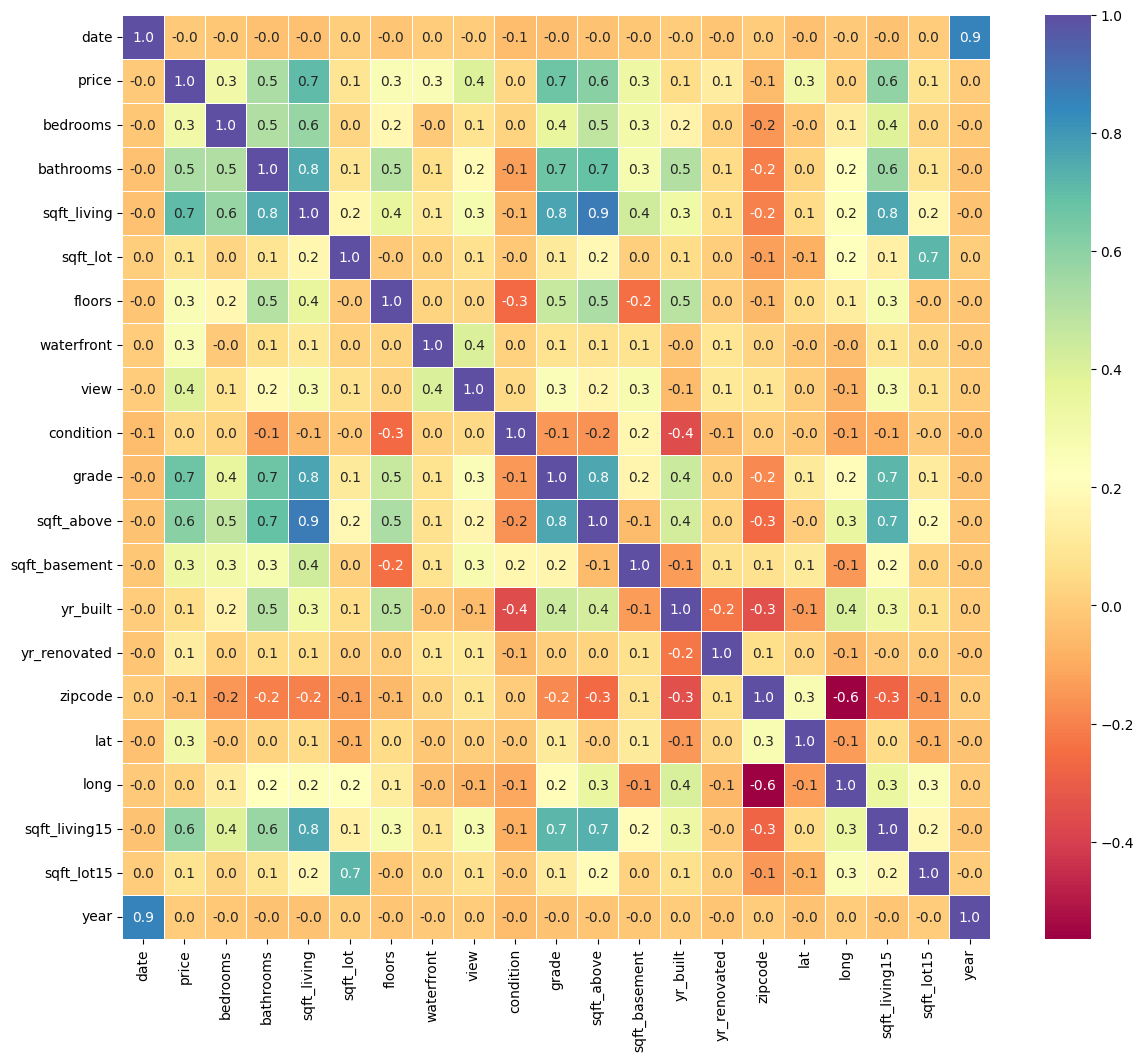

In [28]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(),annot=True,linewidth=0.7,linecolor="white",cmap=sns.color_palette("Spectral", as_cmap=True),fmt=".1f")

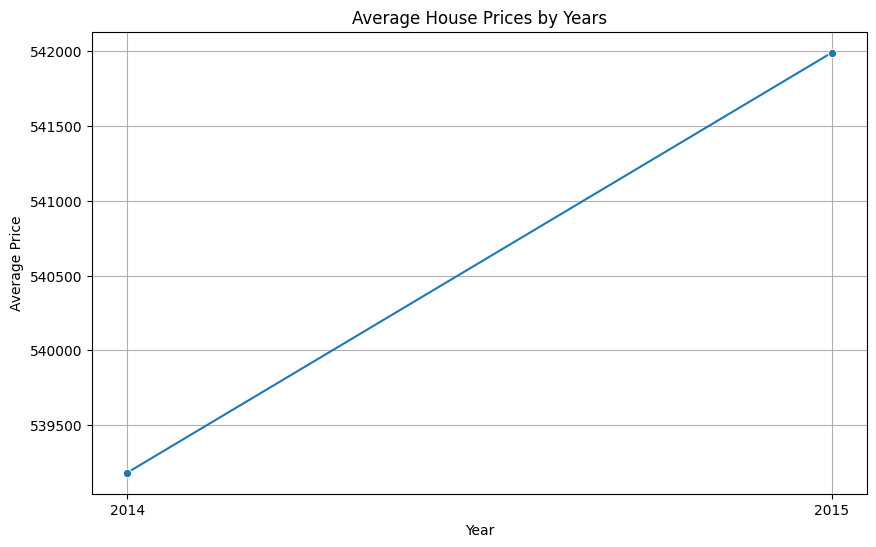

In [12]:
# create the year column
data['year'] = data['date'].dt.year

# calculate the average of prices on a yearly basis
yearly_avg_price = data.groupby('year')['price'].mean().reset_index()

# drawing a time series chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=yearly_avg_price, marker='o')
plt.xticks(yearly_avg_price['year'])
plt.title('Average House Prices by Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


<Axes: ylabel='Density'>

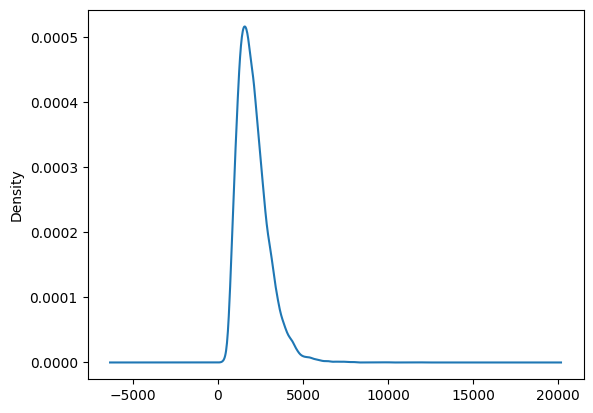

In [13]:
data['sqft_living'].plot(kind='kde')

**Outlier analysis**

In [14]:
# create an outlier list
outlier_list = []

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # determining outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_list.append({
        'Column': column,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers.shape[0]
    })

outlier_summary = pd.DataFrame(outlier_list)

print(outlier_summary)



           Column  Lower Bound   Upper Bound  Outliers Count
0           price -162625.0000  1.129575e+06            1146
1        bedrooms       1.5000  5.500000e+00             546
2       bathrooms       0.6250  3.625000e+00             571
3     sqft_living    -257.5000  4.234500e+03             572
4        sqft_lot   -3432.0000  1.916000e+04            2425
5          floors      -0.5000  3.500000e+00               0
6      waterfront       0.0000  0.000000e+00             163
7            view       0.0000  0.000000e+00            2124
8       condition       1.5000  5.500000e+00              30
9           grade       5.5000  9.500000e+00            1911
10     sqft_above    -340.0000  3.740000e+03             611
11  sqft_basement    -840.0000  1.400000e+03             496
12       yr_built    1882.0000  2.066000e+03               0
13   yr_renovated       0.0000  0.000000e+00             914
14        zipcode   97905.5000  9.824550e+04               0
15            lat      4

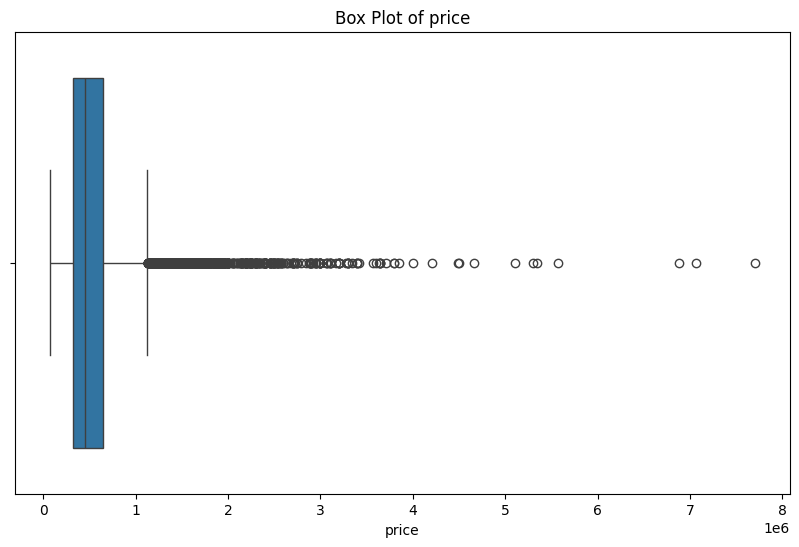

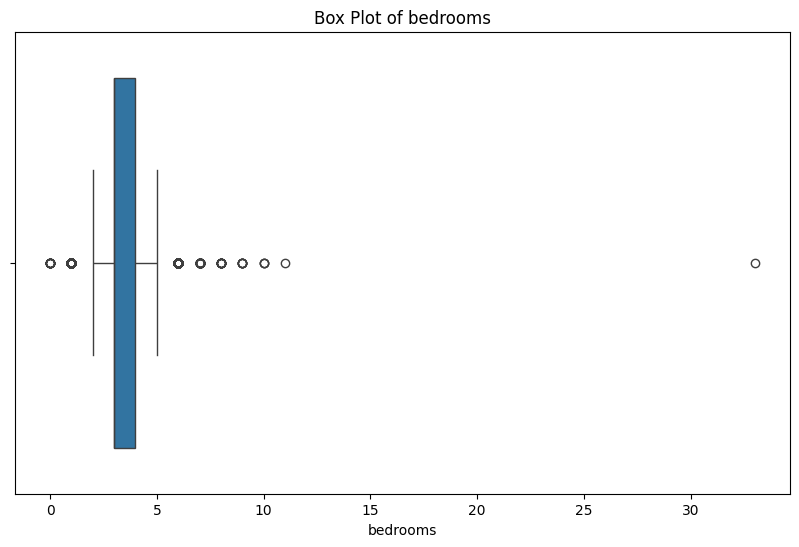

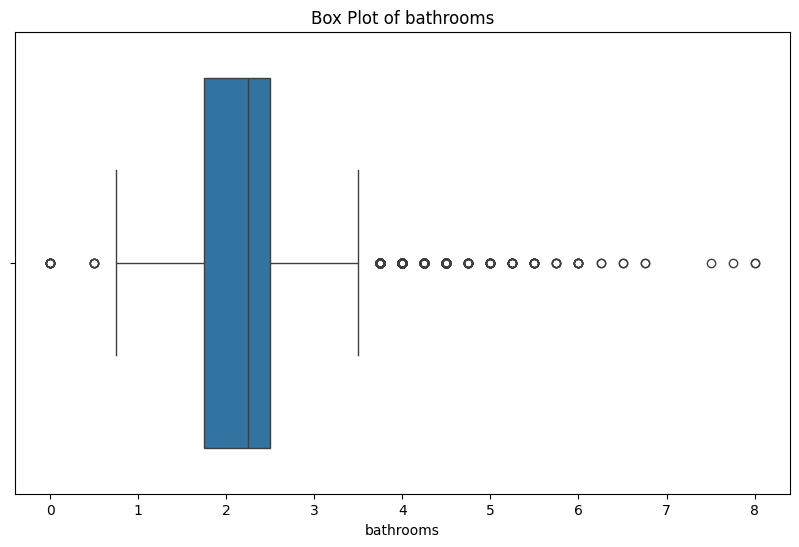

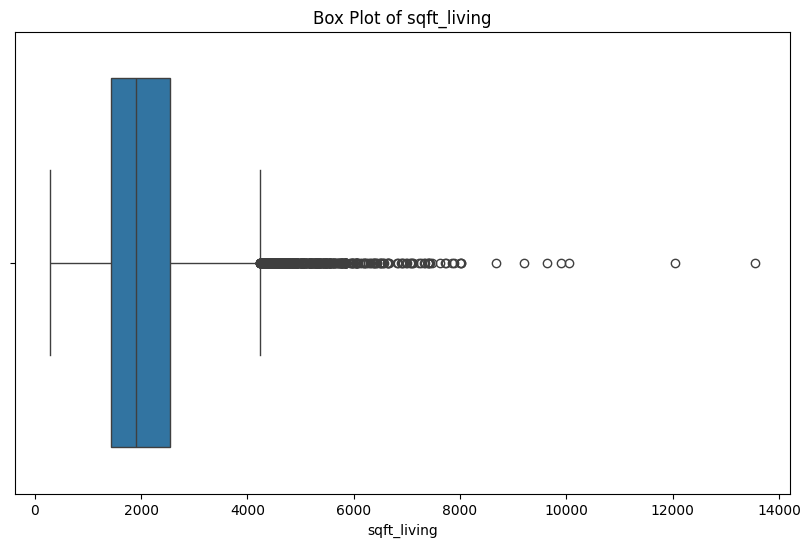

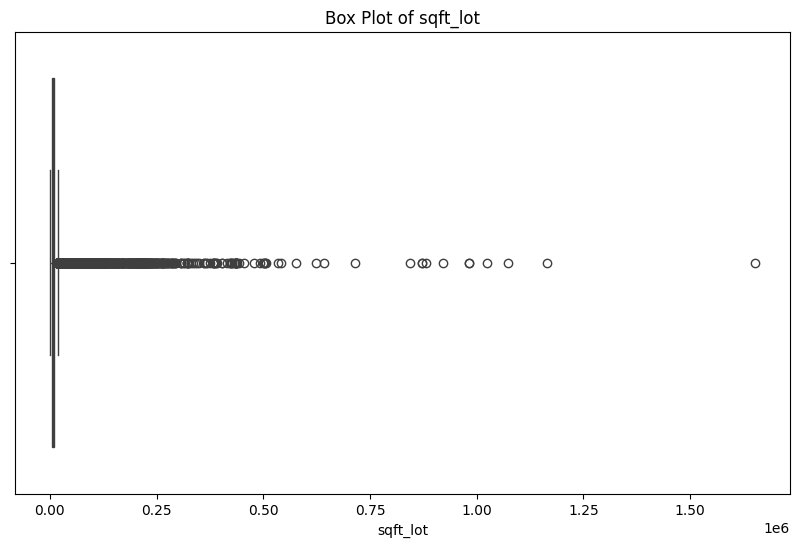

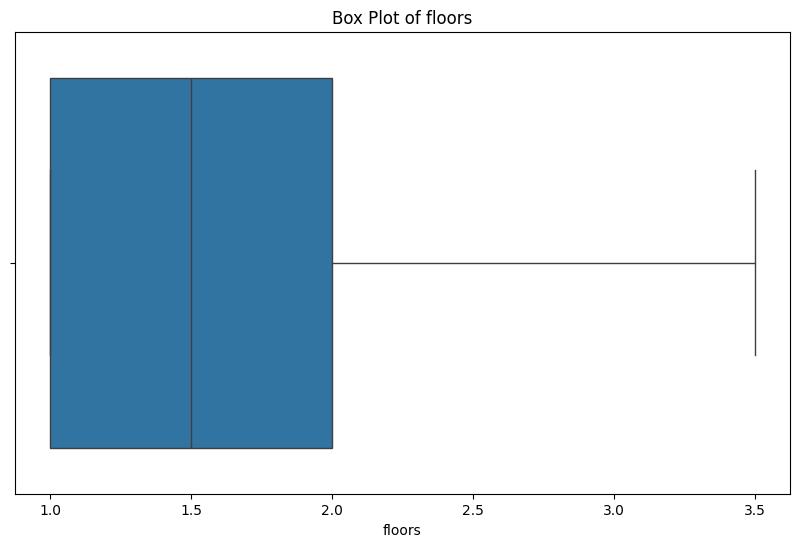

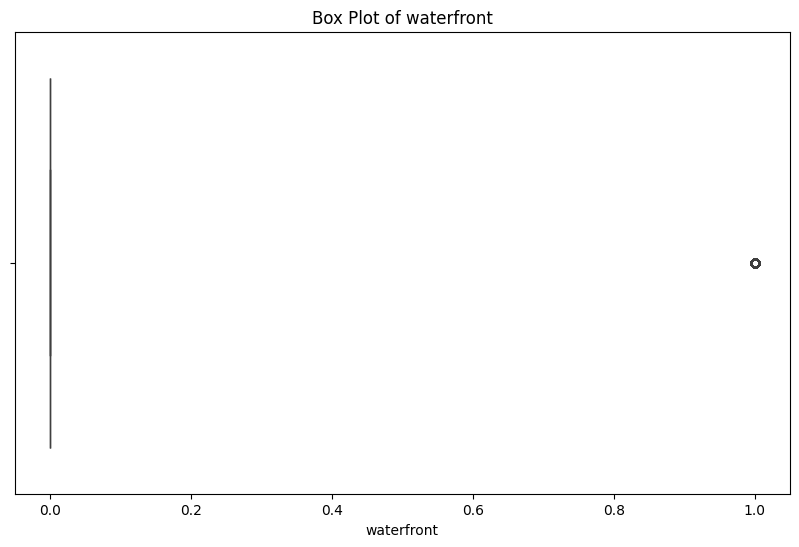

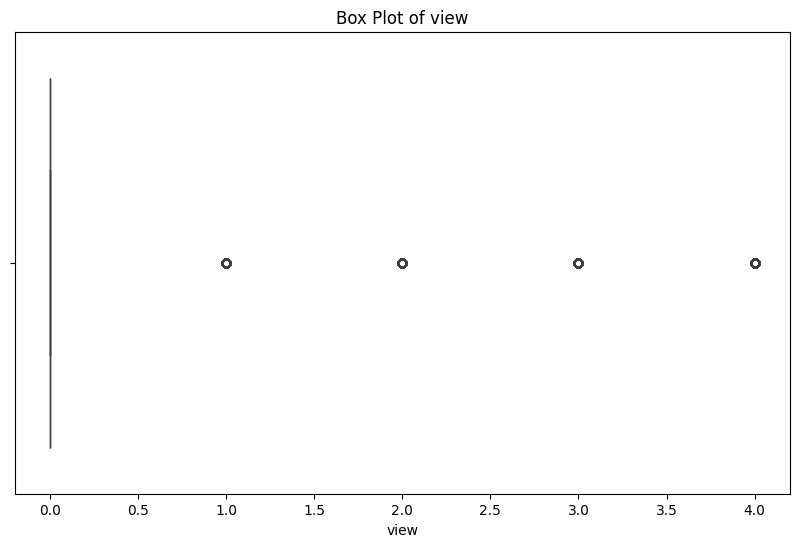

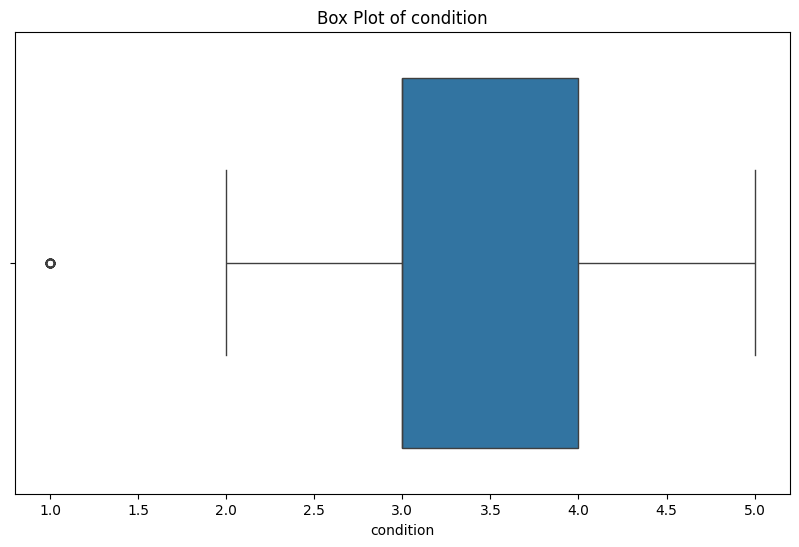

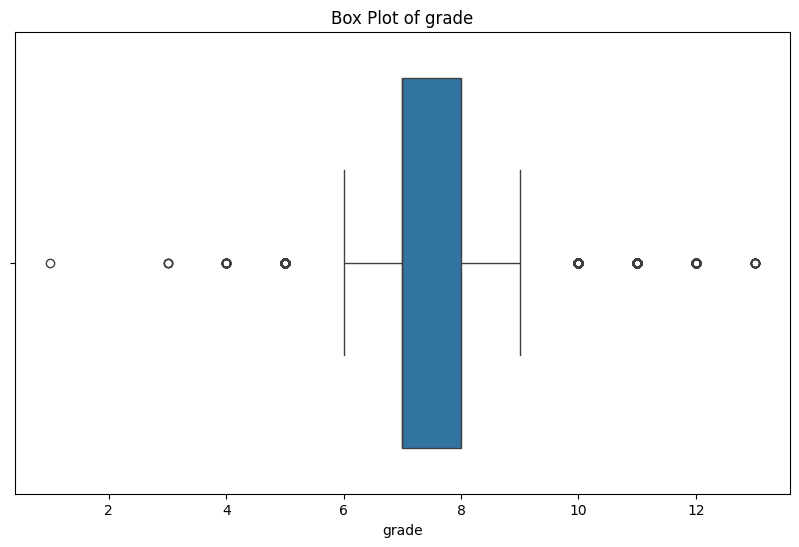

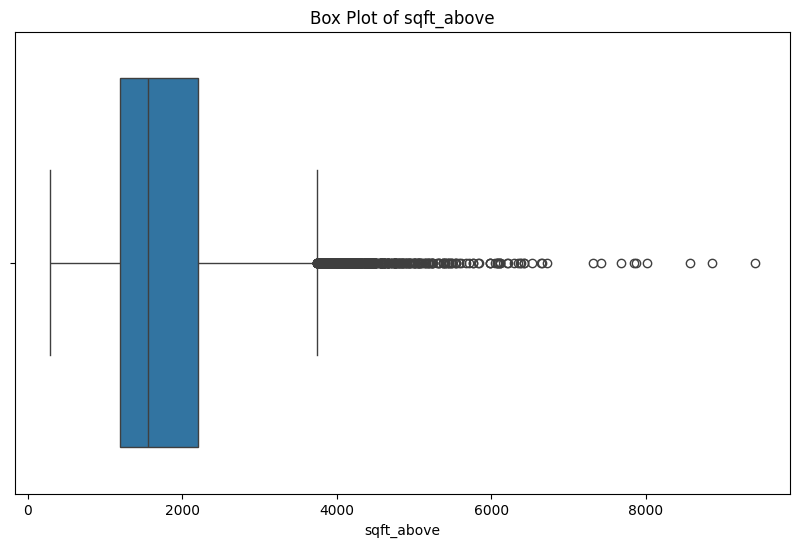

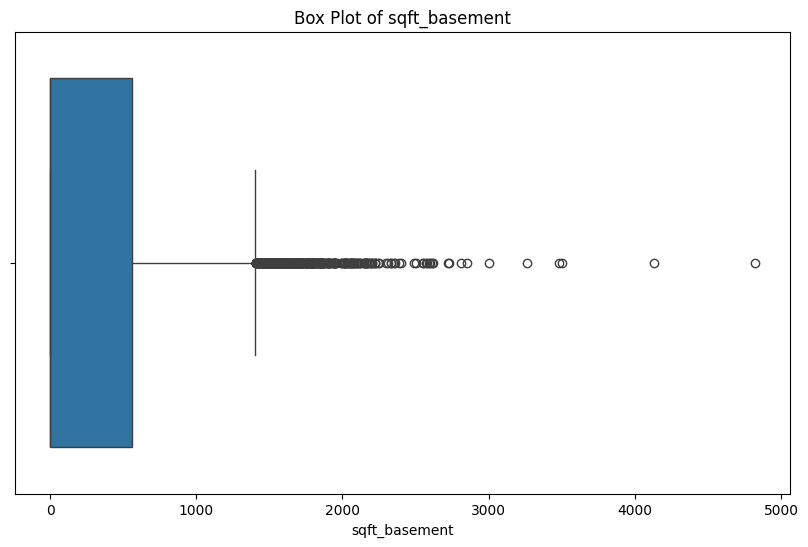

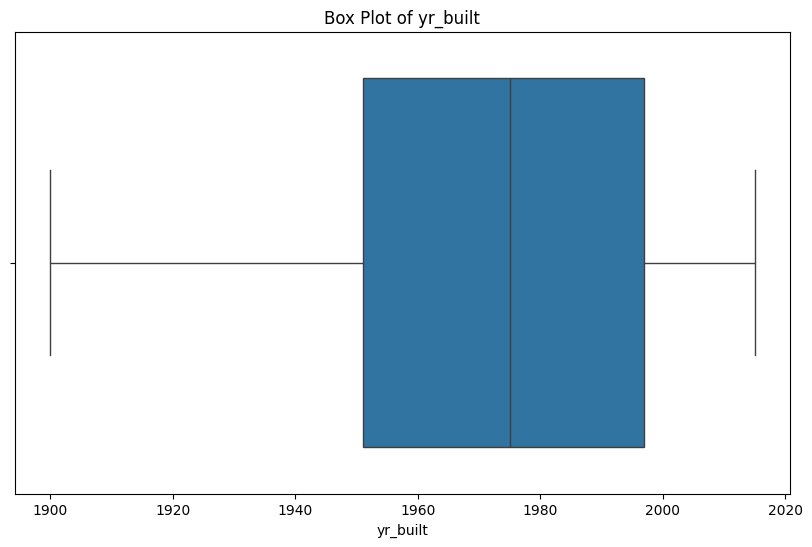

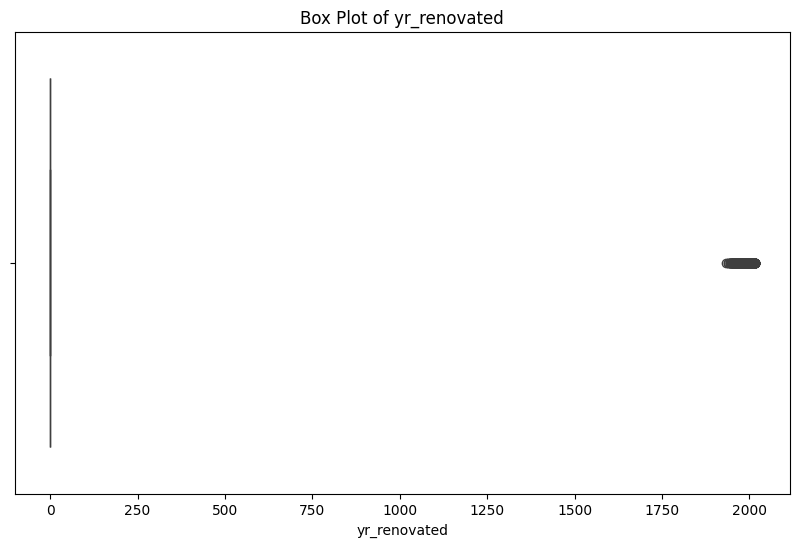

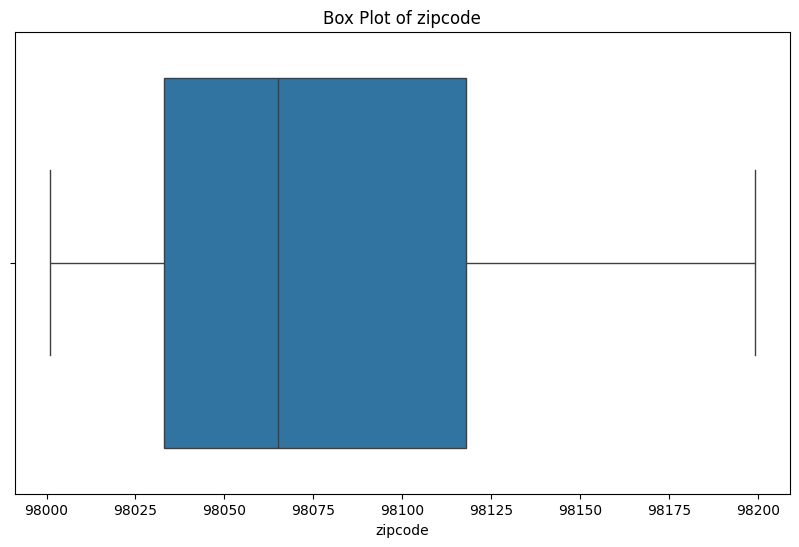

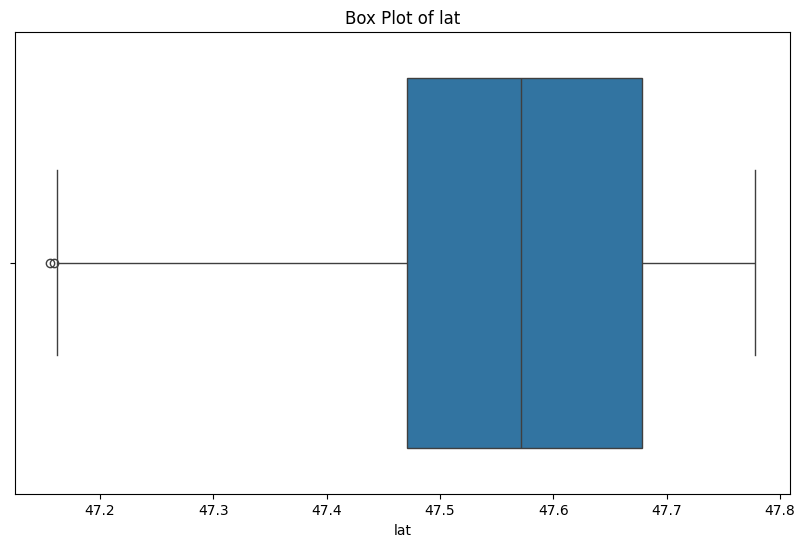

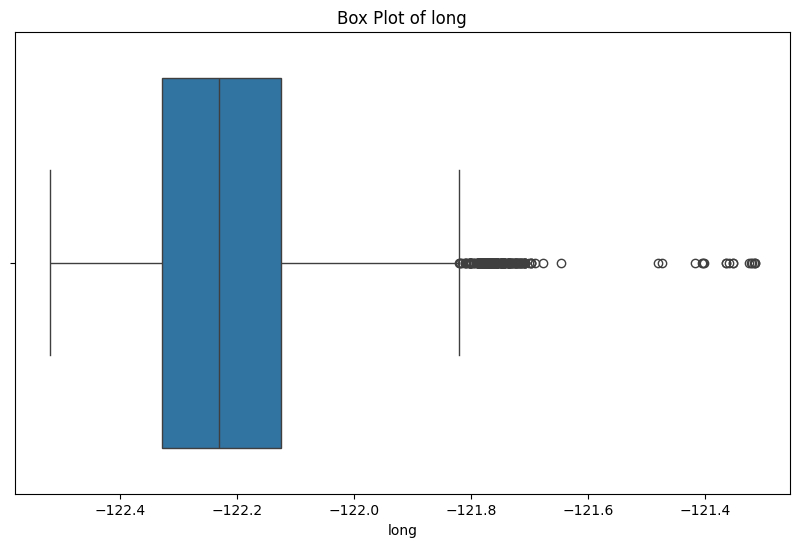

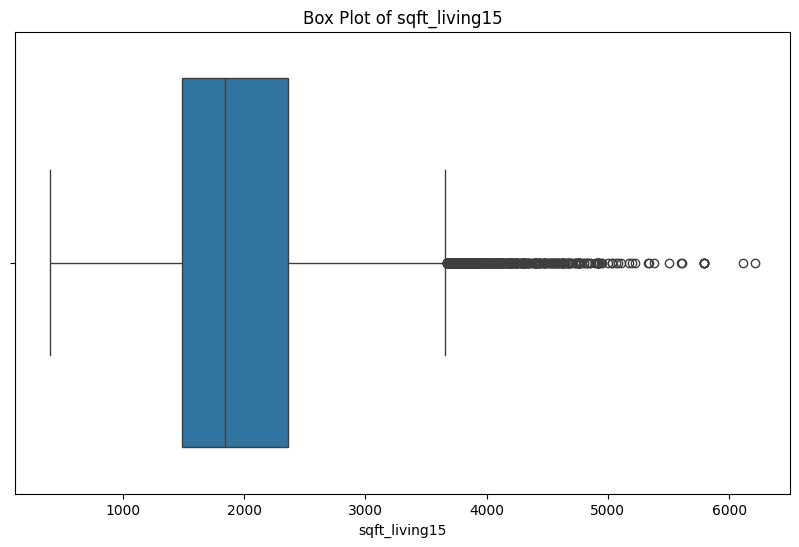

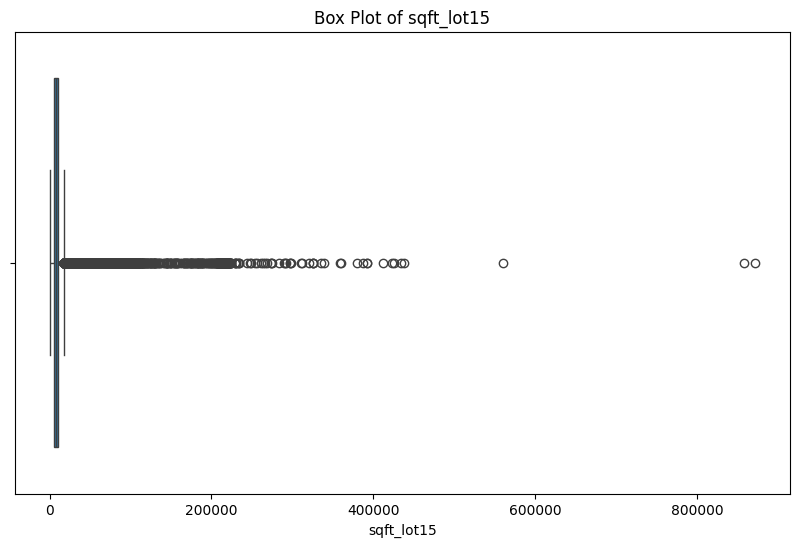

In [15]:
# Create box plots for numeric columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


**Clipping (limit outliers)**

In [16]:
data_clipped = data.copy()
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # limit the outliers
    data_clipped[column] = data_clipped[column].clip(lower_bound, upper_bound)

print("Sınırlandırılmış veri örneği:\n", data_clipped.head(10))


Sınırlandırılmış veri örneği:
         date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13   231300.0       2.0      1.000       1180.0      5650     1.0   
1 2014-12-09   538000.0       3.0      2.250       2570.0      7242     2.0   
2 2015-02-25   180000.0       2.0      1.000        770.0     10000     1.0   
3 2014-12-09   604000.0       4.0      3.000       1960.0      5000     1.0   
4 2015-02-18   510000.0       3.0      2.000       1680.0      8080     1.0   
5 2014-05-12  1129575.0       4.0      3.625       4234.5     19160     1.0   
6 2014-06-27   257500.0       3.0      2.250       1715.0      6819     2.0   
7 2015-01-15   291850.0       3.0      1.500       1060.0      9711     1.0   
8 2015-04-15   229500.0       3.0      1.000       1780.0      7470     1.0   
9 2015-03-12   323000.0       3.0      2.500       1890.0      6560     2.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0    

**Splitting data into train and test set**

In [17]:
from sklearn.model_selection import train_test_split

X = data_clipped.drop('price', axis=1)
y = data_clipped['price']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("Train set shape: ", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape:  (17290, 20)
Test set shape: (4323, 20)


**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
# Parse date column into year, month, day
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day

# drop the original date column
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')



Mean Squared Error (MSE): 16618157055.790289
Root Mean Squared Error (RMSE): 128911.43105167318
Mean Absolute Error (MAE): 97580.50412870097
R^2 Score: 0.7409987730197812


**Ridge Regression**

In [22]:
from sklearn.linear_model import Ridge

# create Ridge model
ridge_model = Ridge(alpha=10)  # Alpha represents the strength of regularization
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}')
print(f'Ridge Regression - RMSE: {rmse_ridge}')
print(f'Ridge Regression - MAE: {mae_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')


Ridge Regression - MSE: 16640686415.196356
Ridge Regression - RMSE: 128998.78454929858
Ridge Regression - MAE: 97570.82751766792
Ridge Regression - R^2 Score: 0.7406476431255541


**Lasso Regression**

In [23]:
from sklearn.linear_model import Lasso

# create Lasso model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}')
print(f'Lasso Regression - RMSE: {rmse_lasso}')
print(f'Lasso Regression - MAE: {mae_lasso}')
print(f'Lasso Regression - R^2 Score: {r2_lasso}')


Lasso Regression - MSE: 16618270126.421535
Lasso Regression - RMSE: 128911.86961029436
Lasso Regression - MAE: 97580.27049413612
Lasso Regression - R^2 Score: 0.740997010764669


**DecisionTreeRegressor**

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 14903329909.687023
Root Mean Squared Error (RMSE): 122079.1952368913
Mean Absolute Error (MAE): 81886.92088827203
R^2 Score: 0.7677251021433215


**RandomForestRegressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 7332057868.41993
Root Mean Squared Error (RMSE): 85627.4364232629
Mean Absolute Error (MAE): 57585.46496183206
R^2 Score: 0.8857266796892467


**Support Vector Regression**

In [26]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=10, epsilon=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 25754377635.841766
Root Mean Squared Error (RMSE): 160481.70498795732
Mean Absolute Error (MAE): 125478.6448243288
R^2 Score: 0.5986067898262677
